In [3]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.font_manager as font_manager

In [8]:
# Set the font to Poppins
font_manager.fontManager.addfont('/content/drive/MyDrive/ColabNotebooks/Projection/Poppins-SemiBold.ttf')
plt.rcParams['font.family'] = 'Poppins'

In [9]:
# Function to get user input for the number of quarters/months and values
def get_input_data():
    data_type = input("Enter 'Q' for quarter data or 'M' for month data: ")
    if data_type.upper() == 'Q':
        num_periods = int(input("Enter the number of quarters' data you have: "))
        values = []
        for i in range(num_periods):
            value = float(input(f"Enter the value for quarter {i+1}: "))
            values.append(value)
        return num_periods, values, 'quarterly'
    elif data_type.upper() == 'M':
        num_periods = int(input("Enter the number of months' data you have: "))
        values = []
        for i in range(num_periods):
            value = float(input(f"Enter the value for month {i+1}: "))
            values.append(value)
        return num_periods, values, 'monthly'
    else:
        print("Invalid data type. Please enter 'Q' or 'M'.")
        return get_input_data()

In [10]:
# Function to calculate the future projection using exponential regression
def calculate_projection(num_periods, values, data_type):
    x = np.arange(1, num_periods + 1)
    coefficients = np.polyfit(x, np.log(values), 1)
    a = np.exp(coefficients[1])
    b = coefficients[0]
    if data_type == 'quarterly':
        num_projection_periods = 4  # 4 quarters (1 year)
    elif data_type == 'monthly':
        num_projection_periods = 12  # 12 months (1 year)
    projections = []
    for i in range(num_periods + 1, num_periods + num_projection_periods + 1):
        projection = a * np.exp(b * i)
        projections.append(projection)
    return projections

In [11]:
# Function to plot the data and projections
def plot_data(values, projections, data_type):
    plt.figure(figsize=(12, 6))
    x = np.arange(1, len(values) + len(projections) + 1)
    data = values + projections
    plt.bar(x, data, color=['r' if i < len(values) else 'g' for i in range(len(data))])

    # Add value labels to the bars
    for i, v in enumerate(data):
        plt.text(i+1, v, str(round(v, 2)), ha='center', va='bottom', fontsize=8)

    if data_type == 'quarterly':
        plt.xticks(np.arange(1, len(data) + 1, 4), [f"Year {i+1}" for i in range(len(data) // 4)])
    elif data_type == 'monthly':
        plt.xticks(np.arange(1, len(data) + 1, 12), [f"Year {i+1}" for i in range(len(data) // 12)])
    plt.xlabel('Years', fontname='Poppins')
    plt.ylabel('Value', fontname='Poppins')
    plt.title('Data and Next Year Projections (Exponential)', fontname='Poppins')
    plt.legend(['Actual Data', 'Projections'], prop={'family': 'Poppins'})
    plt.show()

In [12]:
# Function to display the quarterly projections
def display_quarterly_projections(projections, data_type):
    print("Future Projections for the next 4 quarters:")
    if data_type == 'quarterly':
        for i in range(0, 4):
            quarter_projection = projections[i]
            print(f"Quarter {i+1}: {quarter_projection:.2f}")
    elif data_type == 'monthly':
        for i in range(0, 12, 3):
            quarter_projection = (projections[i] + projections[i+1] + projections[i+2]) / 3
            print(f"Quarter {(i//3)+1}: {quarter_projection:.2f}")

Enter 'Q' for quarter data or 'M' for month data: Q
Enter the number of quarters' data you have: 12
Enter the value for quarter 1: 84
Enter the value for quarter 2: 127
Enter the value for quarter 3: 54
Enter the value for quarter 4: 91
Enter the value for quarter 5: 231
Enter the value for quarter 6: 366
Enter the value for quarter 7: 700
Enter the value for quarter 8: 794
Enter the value for quarter 9: 946
Enter the value for quarter 10: 979
Enter the value for quarter 11: 857
Enter the value for quarter 12: 1113
Future Projections for the next 4 quarters:
Quarter 1: 2172.74
Quarter 2: 2893.67
Quarter 3: 3853.81
Quarter 4: 5132.53


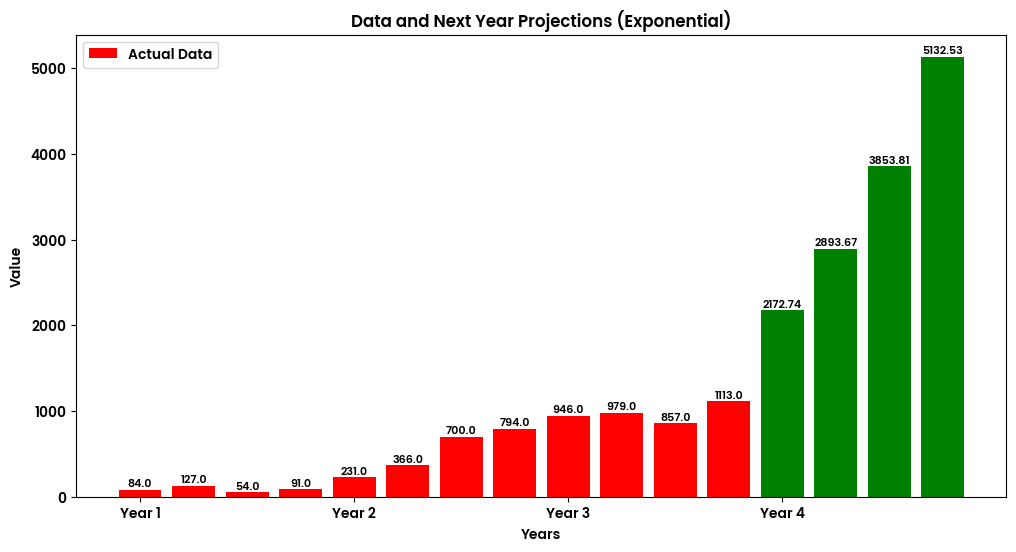

In [13]:
# Main function
def main():
    num_periods, values, data_type = get_input_data()
    projections = calculate_projection(num_periods, values, data_type)
    display_quarterly_projections(projections, data_type)
    plot_data(values, projections, data_type)

if __name__ == "__main__":
    main()